In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [56]:
university_rankings = pd.read_csv(DATA_DIR / 'university_rankings' / 'cwurData.csv')

In [57]:
university_rankings = university_rankings[university_rankings.country == 'USA']

In [58]:
university_rankings = university_rankings[university_rankings.year == 2015]

In [59]:
len(university_rankings)

229

In [60]:
university_rankings[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015


In [61]:
university_locs = pd.read_csv(DATA_DIR / "university_locations" / 'university_locs.csv')

In [70]:
university_locs[:3]

,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",President,2563725000,636001109,197216455,100200,1,www.aamu.edu/,https://www.aamu.edu/admissions-aid/index.html,https://www.aamu.edu/admissions-aid/financial-...,https://www.aamu.edu/admissions-aid/undergradu...,www.aamu.edu/admissions-aid/tuition-fees/net-p...,,,https://www.aamu.edu/administrativeoffices/VAD...,1,1,1,9,1,1,12,1,1,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,18,16,17,10,4,14,18,18,16,1,3,2,-2,-2,26620,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
1,100663,University of Alabama at Birmingham,,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,President,2059344011,636005396,063690705,105200,1,https://www.uab.edu/,https://www.uab.edu/students/admissions/,https://www.uab.edu/students/paying-for-college,https://ssb.it.uab.edu/pls/sctprod/zsapk003_ug...,https://uab.studentaidcalculator.com/survey.aspx,https://www.uab.edu/students/veterans,https://www.uab.edu/registrar/students,https://www.uab.edu/students/disability/,1,1,1,9,1,1,11,1,2,1,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,17,17,9,5,15,15,15,15,2,5,1,The University of Alabama System,101050,13820,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,95,1
2,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael C.Turner,President,33438738777550,237034324,126307792,2503400,1,www.amridgeuniversity.edu/,www.amridgeuniversity.edu/admissions/,www.amridgeuniversity.edu/financialaid/,https://www2.amridgeuniversity.edu/Amridge/Log...,www2.amridgeuniversity.edu:9091/,www.amridgeuniversity.edu/admissions/military/,,www.amridgeuniversity.edu/academics/,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,20,19,18,5,5,6,20,21,51,2,1,2,-2,-2,33860,1,388,-2,1101,Montgomery County,102,-86.174010,32.362609,126,2


In [63]:
def strip_name(name):
    return ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyz', name.lower()))

In [64]:
stripped_institution = np.array([strip_name(i) for i in university_locs.INSTNM.values])

In [65]:
stripped_alias = np.array([strip_name(i) if type(i) == str else np.nan for i in university_locs.IALIAS.values])

In [66]:
import difflib

In [67]:
hand_matched = {
    "universityatbuffalothestateuniversityofnewyork": "universityatbuffalo",
    "sunydownstatemedicalcenter": "SUNYDownstateHealthSciencesUniversity".lower(),
    "lsuhealthsciencescenterneworleans": "LouisianaStateUniversityHealthSciencesCenterNewOrleans".lower(),
    "texasamhealthsciencecenter": "TheUniversityofTexasHealthScienceCenteratHouston".lower(),
    "stateuniversityofnewyorkupstatemedicaluniversity": "UpstateMedicalUniversity".lower(),
    "rutgersthestateuniversityofnewjerseynewark":"RutgersUniversityNewark".lower(),
    "queenscollegecityuniversityofnewyork":"CUNYQueensCollege".lower(),
    "huntercollege": "CUNYHunterCollege".lower()
    
}

In [68]:
hand_matched.keys()

dict_keys(['universityatbuffalothestateuniversityofnewyork', 'sunydownstatemedicalcenter', 'lsuhealthsciencescenterneworleans', 'texasamhealthsciencecenter', 'stateuniversityofnewyorkupstatemedicaluniversity', 'rutgersthestateuniversityofnewjerseynewark', 'queenscollegecityuniversityofnewyork', 'huntercollege'])

In [69]:
matches = []
for institution in tqdm(university_rankings.institution.values):
    lower_institution = ''.join(filter( lambda x: x in '0123456789abcdefghijklmnopqrstuvwxyz', institution.lower()))
    if lower_institution in hand_matched.keys():
        new_name = hand_matched[lower_institution]
        match = np.where(new_name == stripped_institution)[0]
    else:
        match = np.where(lower_institution == stripped_institution)[0]
    if len(match) != 1:
        match = np.where(lower_institution == stripped_alias)[0]
    if len(match) != 1:
        the_lower_institution = 'the'+lower_institution
        match = np.where(the_lower_institution == stripped_institution)[0]
        if len(match) != 1:
            match = np.where(the_lower_institution == stripped_alias)[0]
        if len(match) != 1:
            #print(institution, lower_institution)
            
            the_lower_institution = lower_institution+'campus'
            match = np.where(the_lower_institution == stripped_institution)[0]
            if len(match) != 1:
                match = np.where(the_lower_institution == stripped_alias)[0]
            if len(match) != 1:
                #print(institution, lower_institution)
                new_name = difflib.get_close_matches(institution, stripped_institution)
                if len(new_name) > 0:
                    new_name = new_name[0]
                #print('\t', new_name)
                match = np.where(new_name == stripped_institution)[0]
    matches.append(match)
matches = np.concatenate(matches)

  0%|          | 0/229 [00:00<?, ?it/s]

In [71]:
matches

array([1503, 3826, 1520, 2153,  221,  907, 2049, 2159,  623,  203, 2978,
        224, 1423, 2267, 1630,  226, 1001, 3733,  227, 2413, 2296, 3405,
       3625,  946, 2457, 5814, 1075, 1962, 2987, 2970, 1709, 2651, 2055,
        489, 1885,  222,  529,  686, 2845,  228, 1473,   76, 3249, 3461,
       1429, 3397, 1100, 2790, 2295, 3057,  807,  223, 4288, 1561, 4213,
       3402, 2553, 1083,  640, 1632, 3368, 3269,  545,  718, 2331, 3406,
       1151, 3384, 2256,    1,  229, 2562, 2495, 1076, 2789, 2382, 1427,
       4203, 1522, 3318, 1148, 1667,  749, 1847, 1222,  816,  639,  943,
        225,  585, 1514, 3240, 2455, 3398, 3422,  684, 3029, 3558, 2860,
       3560, 2791, 2916, 1282,  537, 3101, 2330, 1474, 1540,  629, 2292,
       5700, 3415, 3698, 1286, 3113, 3103, 1937, 1018, 3481, 1472, 1333,
       2792, 2744,  621, 1225, 3210,  176,  440, 1867,  535, 3399, 3624,
       3026, 2328,  657, 1935, 3440,    3, 2740, 3504, 3489,  545,  113,
        976, 3674, 1695, 2579, 1954, 5608, 2352, 37

In [17]:
university_rankings['CSA'] = university_locs.CSA.values[matches]
university_rankings['CITY'] = university_locs.CITY.values[matches]
university_rankings['STATE'] = university_locs.STABBR.values[matches]
university_rankings['LONGITUDE'] = university_locs.LONGITUD.values[matches]
university_rankings['LATITUDE'] = university_locs.LATITUDE.values[matches]
university_rankings['INSTNM'] = university_locs.INSTNM.values[matches]
university_rankings['IALIAS'] = university_locs.IALIAS.values[matches]

In [18]:
university_rankings[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,CSA,CITY,STATE,LONGITUDE,LATITUDE,INSTNM,IALIAS
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015,148,Cambridge,MA,-71.118313,42.374471,Harvard University,
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015,488,Stanford,CA,-122.167359,37.429434,Stanford University,
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015,148,Cambridge,MA,-71.093226,42.359243,Massachusetts Institute of Technology,"MIT, M.I.T."


### 

In [19]:
stat_area_df = pd.read_excel(DATA_DIR / "statistical_areas" / "statistical_areas.xlsx", skiprows=2)
stat_area_df[:3]

,CBSA Code,Metropolitan Division Code,CSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Metropolitan Division Title,CSA Title,County/County Equivalent,State Name,FIPS State Code,FIPS County Code,Central/Outlying County
0,10100,NaN,NaN,"Aberdeen, SD",Micropolitan Statistical Area,NaN,NaN,Brown County,South Dakota,46.0,13.0,Central
1,10100,NaN,NaN,"Aberdeen, SD",Micropolitan Statistical Area,NaN,NaN,Edmunds County,South Dakota,46.0,45.0,Outlying
2,10140,NaN,NaN,"Aberdeen, WA",Micropolitan Statistical Area,NaN,NaN,Grays Harbor County,Washington,53.0,27.0,Central


In [20]:
stat_area_df2 = pd.read_excel(DATA_DIR / "statistical_areas" / "statistical_areas2.xlsx", skiprows=2)
stat_area_df2[:3]

,CBSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Principal City Name,FIPS State Code,FIPS Place Code
0,10100,"Aberdeen, SD",Micropolitan Statistical Area,Aberdeen,46.0,100.0
1,10140,"Aberdeen, WA",Micropolitan Statistical Area,Aberdeen,53.0,100.0
2,10180,"Abilene, TX",Metropolitan Statistical Area,Abilene,48.0,1000.0


In [21]:
states = [i.split(', ')[1].split('-') if type(i) == str else np.nan for i in stat_area_df2['CBSA Title'].values]

In [22]:
manual_match = {
    "University of California, San Diego": "San Diego-Chula Vista-Carlsbad, CA",
    "Dartmouth College": np.nan, # not in a statistical area
    "University of Massachusetts Amherst": "Springfield, MA",
    "University of Hawaii at Manoa": "Urban Honolulu, HI",
    "University of Mississippi - Oxford Campus": np.nan,
    "University of Arkansas - Fayetteville": "Fayetteville-Springdale-Rogers, AR",
    "Mississippi State University": np.nan,
    "Binghamton University": "Binghamton, NY",
    "University of Maine, Orono": np.nan,
    "University of Mississippi Medical Center": "Jackson-Vicksburg-Brookhaven, MS",
    "Clarkson University": np.nan
}

In [47]:
stat_areas = []
for idx, row in tqdm(university_rankings.iterrows(), total=len(university_rankings)):
    if row.institution in manual_match.keys():
        #print(row.institution)
        stat_areas.append(manual_match[row.institution])
        continue
        
    
    state_mask = np.array([row.STATE in i if type(i) == list else False for i in states])
    stat_stat_areas = stat_area_df2[state_mask]
    matches = row.CITY == stat_stat_areas["Principal City Name"].values
    if np.sum(matches) == 1:
        stat_areas.append(stat_stat_areas["CBSA Title"].values[np.where(matches)[0][0]])
        
    else:
        # try matching by CSA
        CSA_match = np.where((stat_area_df['CSA Code'].values == row.CSA))[0]
        if len(CSA_match) > 0:
            stat_areas.append(stat_area_df.iloc[CSA_match[0]]["CSA Title"])
            #if row.institution == "Stanford University":
            #    breakme
        else:
            print(row.institution)#, '\n\t', row.STATE, row.CITY)

  0%|          | 0/229 [00:00<?, ?it/s]

In [48]:
university_rankings['CBSA'] = stat_areas

In [49]:
university_rankings[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,CSA,CITY,STATE,LONGITUDE,LATITUDE,INSTNM,IALIAS,CBSA
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015,148,Cambridge,MA,-71.118313,42.374471,Harvard University,,"Boston-Cambridge-Newton, MA-NH"
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015,488,Stanford,CA,-122.167359,37.429434,Stanford University,,"San Jose-San Francisco-Oakland, CA"
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015,148,Cambridge,MA,-71.093226,42.359243,Massachusetts Institute of Technology,"MIT, M.I.T.","Boston-Cambridge-Newton, MA-NH"


In [50]:
university_rankings.to_pickle(DATA_DIR/ 'university_ranking_statistical_area.pickle')

In [51]:
len(university_rankings)

229

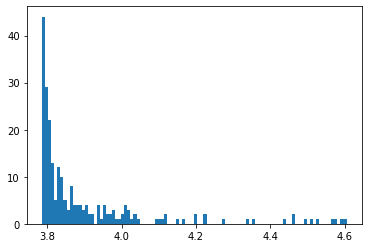

In [52]:
plt.hist(np.log(university_rankings.score.values), bins=100);